In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 293.3/293.3 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 14.3 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 21.3 MB/s eta 0:00:00
     ------------------------------------- 163.0/163.0 kB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 17.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
#to read the data 
df=pd.read_csv("Data/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [12]:
#to find any missing values are available
df.isnull().sum()

#no missing values

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10001 non-null  int64  
 1   carat    10001 non-null  float64
 2   cut      10001 non-null  object 
 3   color    10001 non-null  object 
 4   clarity  10001 non-null  object 
 5   depth    10001 non-null  float64
 6   table    10001 non-null  float64
 7   x        10001 non-null  float64
 8   y        10001 non-null  float64
 9   z        10001 non-null  float64
 10  price    10001 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 859.6+ KB


In [ ]:
#by refering this we could see 3 categorical features which are represented as object and the 8 numerical features
#we have to handle those separately


In [15]:
#we will drop the id column since that is unique and it doesnt impact the output
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [16]:
#we will find whether we have any duplcates entry
df.duplicated().sum()

#no duplication, if it is there then we need to drop it

0

In [18]:
df.describe()

,carat,depth,table,x,y,z,price
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,0.793429,61.807699,57.232837,5.719896,5.724797,3.535669,4001.906709
std,0.467048,1.082206,1.927660,1.117440,1.110583,0.690366,4082.595530
min,0.200000,54.700000,51.000000,3.780000,3.780000,0.000000,344.000000
25%,0.390000,61.300000,56.000000,4.690000,4.700000,2.900000,945.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2442.000000
75%,1.030000,62.400000,58.000000,6.520000,6.510000,4.030000,5407.000000
max,3.010000,68.300000,68.000000,9.430000,9.340000,5.620000,18818.000000


In [39]:
df[['carat','x','y']]
df.columns['carat']


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [42]:
#segregate the numerical and categorical features
df.head()
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical:",numerical_columns)
print("Categorical:",categorical_columns)

Numerical: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical: Index(['cut', 'color', 'clarity'], dtype='object')


In [43]:
df[numerical_columns]


,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
9996,2.20,62.6,59.0,8.31,8.25,5.18,12787
9997,2.05,58.8,59.0,8.32,8.26,4.93,10036
9998,0.71,61.0,56.0,5.74,5.77,3.51,3271
9999,1.02,61.8,57.0,6.42,6.46,3.99,6666


In [44]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,0.793429,61.807699,57.232837,5.719896,5.724797,3.535669,4001.906709
std,0.467048,1.082206,1.927660,1.117440,1.110583,0.690366,4082.595530
min,0.200000,54.700000,51.000000,3.780000,3.780000,0.000000,344.000000
25%,0.390000,61.300000,56.000000,4.690000,4.700000,2.900000,945.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2442.000000
75%,1.030000,62.400000,58.000000,6.520000,6.510000,4.030000,5407.000000
max,3.010000,68.300000,68.000000,9.430000,9.340000,5.620000,18818.000000


In [45]:
df[categorical_columns].describe()

,cut,color,clarity
count,10001,10001,10001
unique,5,7,8
top,Ideal,G,SI1
freq,4790,2333,2717


In [47]:
df['cut'].value_counts()

Ideal        4790
Premium      2590
Very Good    1930
Good          579
Fair          112
Name: cut, dtype: int64

In [48]:
df['color'].value_counts()

G    2333
E    1817
F    1727
H    1609
D    1310
I     896
J     309
Name: color, dtype: int64

In [52]:
df['clarity'].value_counts()

SI1     2717
VS2     2427
SI2     1619
VS1     1599
VVS2     825
VVS1     561
IF       219
I1        34
Name: clarity, dtype: int64

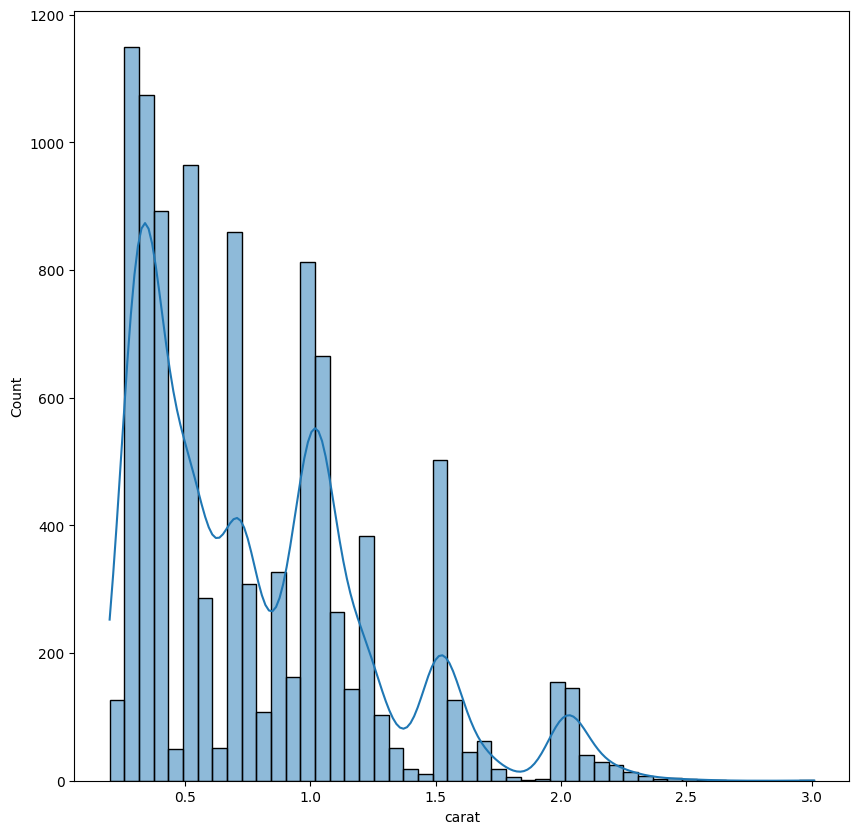

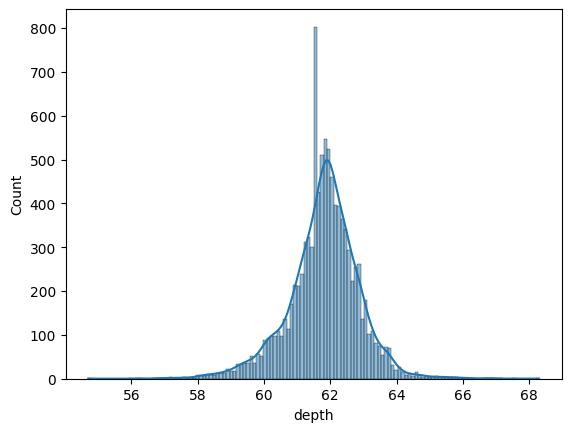

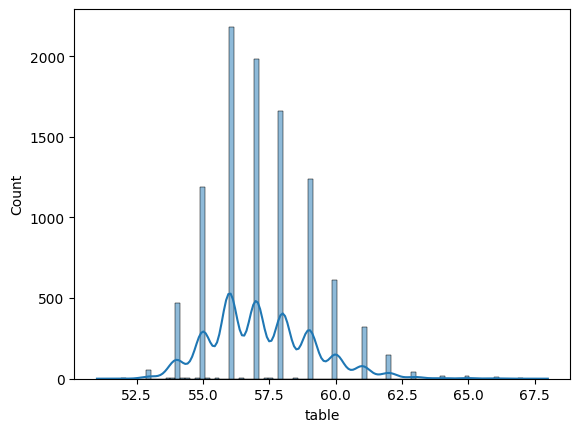

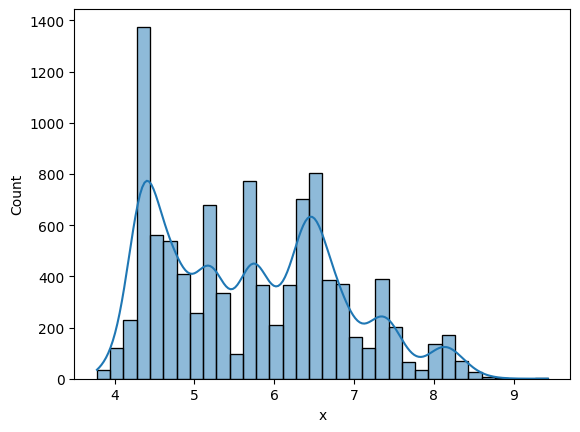

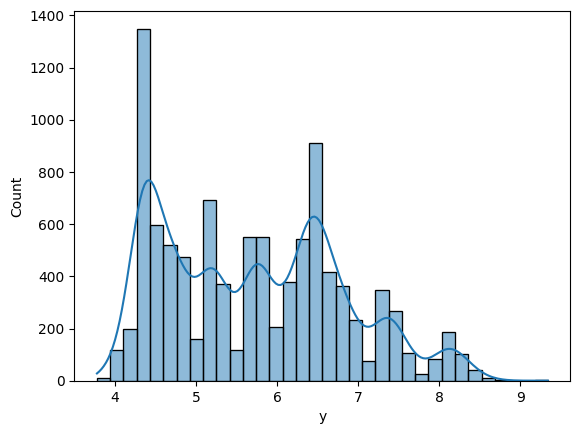

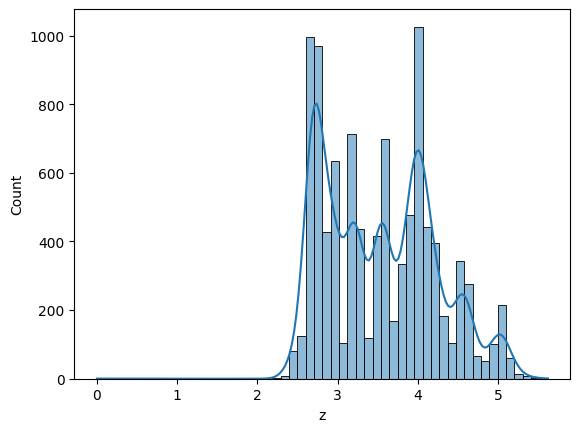

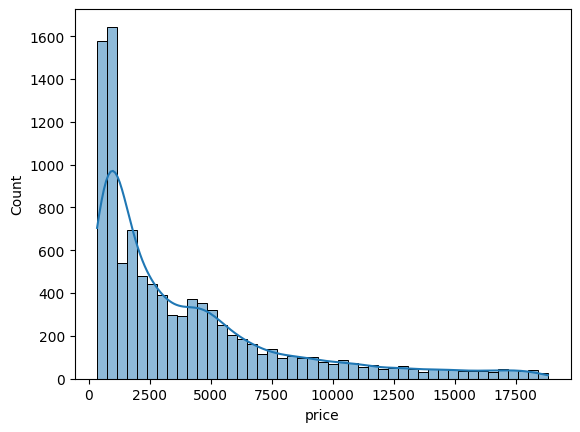

In [55]:
#visualize the datas for the numerical cols and categorical cols separetely
Univariate Analysis
plt.figure(figsize=(10,10))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()


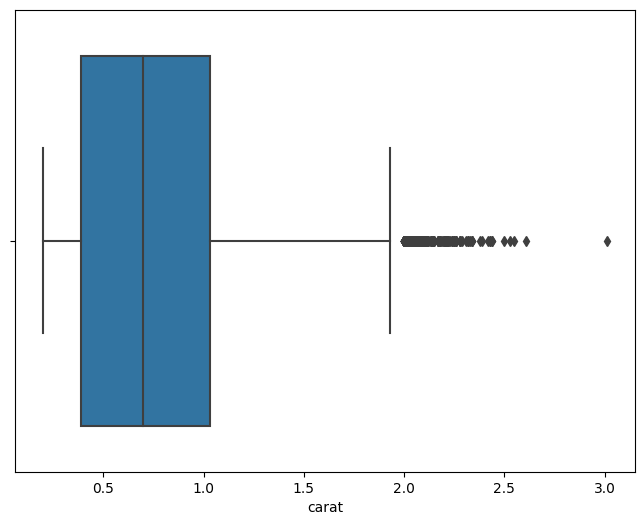

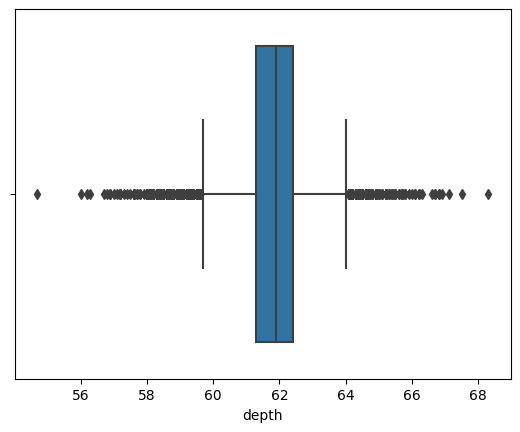

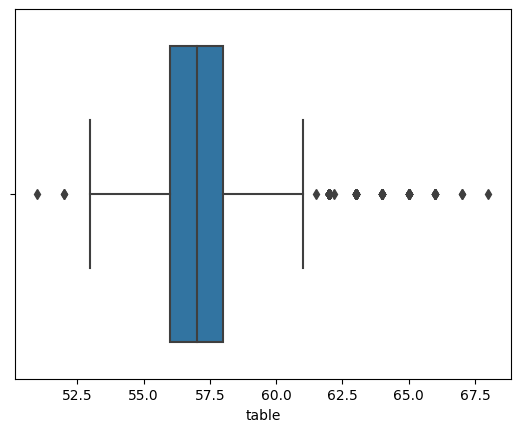

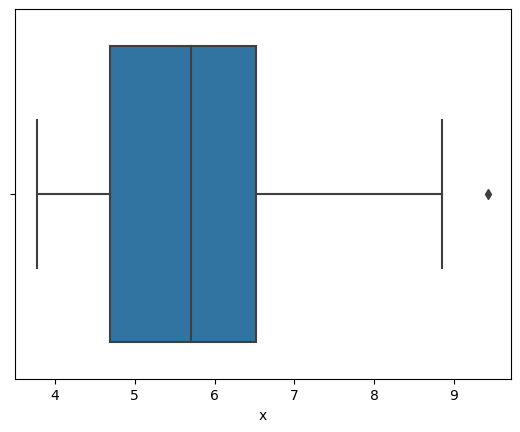

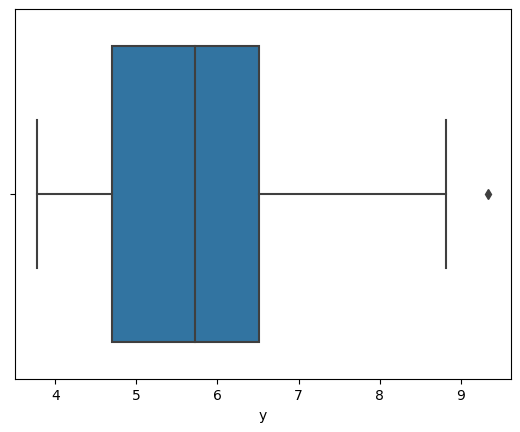

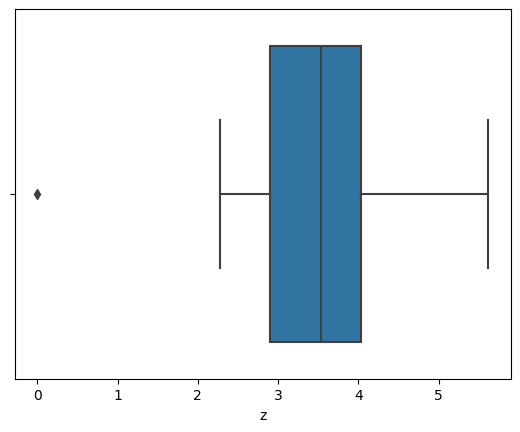

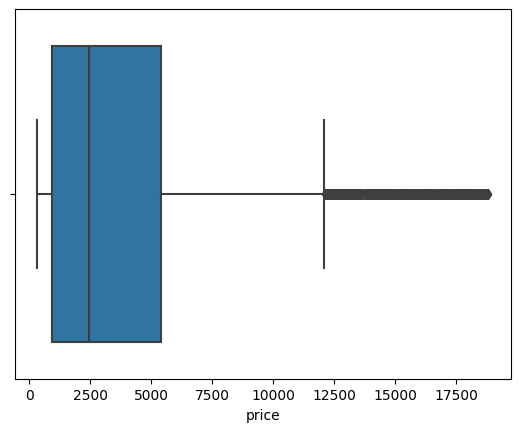

In [62]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.boxplot(data=df, x=i)
    plt.show()